In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

In [12]:
dfs = pd.read_excel('mis_gastos.xlsx',engine = "openpyxl", sheet_name= None )
file_categorias = "categorias.json"
comercio_categoria_dict = json.load(open(file_categorias))
# categories = [set(comercio_categoria_dict.items())]

In [13]:
# selection = widgets.Dropdown(
#     options= categories,
#     description='Category:',
#     disabled=False,
# )
# display(selection)

Dropdown(description='Category:', options=({('VIPS NOCHE Y DIA', 'supermercado'), ('PLAZA MAYOR', 'restaurante…

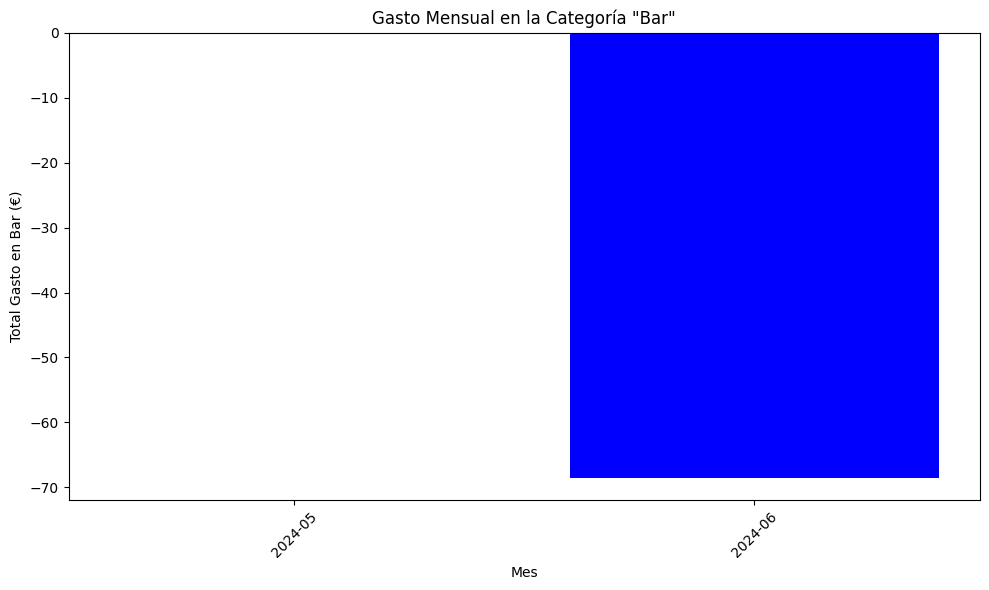

In [14]:
# Inicializar un diccionario para almacenar los gastos por mes
monthly_bar_expenses = {}
for sheet_name, df in dfs.items():
    # Filtrar las filas donde el Tipo de Comercio es "bar"
    bar_expenses = df[df['Tipo de Comercio'] == 'bar']
    # Calcular el gasto total para este mes
    total_bar_expenses = bar_expenses['IMPORTE'].sum()
    # Almacenar el resultado en el diccionario
    monthly_bar_expenses[sheet_name] = total_bar_expenses
    
# Convertir el diccionario a un DataFrame para facilitar la visualización
monthly_bar_expenses_df = pd.DataFrame.from_dict(monthly_bar_expenses, orient='index', columns=['Total Gasto en Bar'])
monthly_bar_expenses_df.index.name = 'Mes'
monthly_bar_expenses_df.reset_index(inplace=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(monthly_bar_expenses_df['Mes'], monthly_bar_expenses_df['Total Gasto en Bar'], color='blue')
plt.xlabel('Mes')
plt.ylabel('Total Gasto en Bar (€)')
plt.title('Gasto Mensual en la Categoría "Bar"')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
monthly_bar_expenses_df

,Mes,Total Gasto en Bar
0,2024-05,0.00
1,2024-06,-68.55
